# Multivariate Linear Regresssion


    y = b0 + b1 * x1 + b2 * x2 + b3 * x3

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from mpl_toolkits import mplot3d

# Import csv

In [2]:
df=pd.read_csv('data/Salary_multiple.csv')

In [3]:
df.head()

,YearsExperience,Field,Salary
0,1.1,Technical,39343.0
1,1.3,Non-Technical,26205.0
2,1.5,Technical,37731.0
3,2.0,Non-Technical,28525.0
4,2.2,Technical,39891.0


# Simple Encoding

In [4]:
df.loc[:,'Field'].replace(['Technical','Non-Technical'],[0,1],inplace=True)

In [5]:
print(df.head())

   YearsExperience  Field   Salary
0              1.1      0  39343.0
1              1.3      1  26205.0
2              1.5      0  37731.0
3              2.0      1  28525.0
4              2.2      0  39891.0


# Splitting x and y

In [6]:
#split x and y
x=df.iloc[:,:-1].values
print(x)
y=df.iloc[:,2].values
print(y)

[[ 1.1  0. ]
 [ 1.3  1. ]
 [ 1.5  0. ]
 [ 2.   1. ]
 [ 2.2  0. ]
 [ 2.9  1. ]
 [ 3.   0. ]
 [ 3.2  1. ]
 [ 3.2  0. ]
 [ 3.7  0. ]
 [ 3.9  1. ]
 [ 4.   0. ]
 [ 4.   0. ]
 [ 4.1  0. ]
 [ 4.5  1. ]
 [ 4.9  1. ]
 [ 5.1  1. ]
 [ 5.3  0. ]
 [ 5.9  0. ]
 [ 6.   1. ]
 [ 6.8  1. ]
 [ 7.1  0. ]
 [ 7.9  0. ]
 [ 8.2  1. ]
 [ 8.7  0. ]
 [ 9.   1. ]
 [ 9.5  1. ]
 [ 9.6  0. ]
 [10.3  1. ]
 [10.5  0. ]]
[ 39343.  26205.  37731.  28525.  39891.  36642.  60150.  34445.  64445.
  57189.  43218.  55794.  56957.  57081.  41111.  47938.  56029.  83088.
  81363.  53940.  61738.  98273. 101302.  73812. 109431.  75582.  76969.
 112635.  82391. 121872.]


In [7]:
x=x.reshape(-1,2)
y=y.reshape(-1,1)

# Plot Data

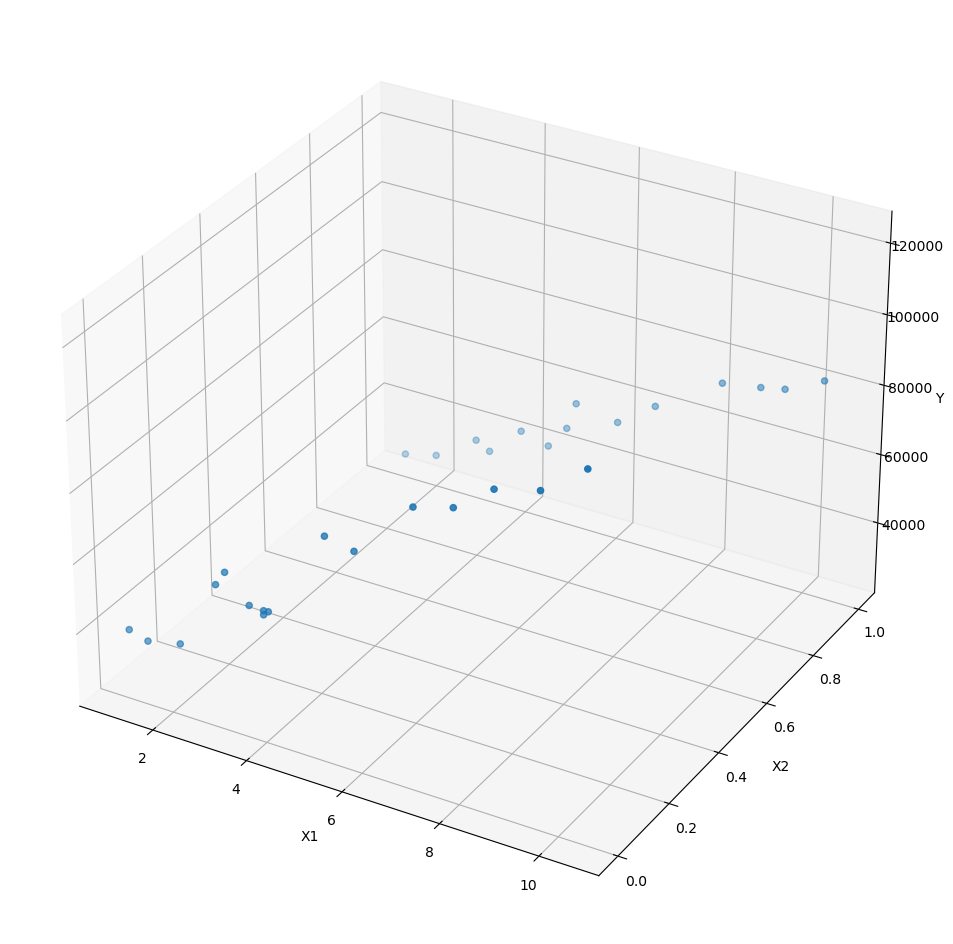

In [8]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

sequence_containing_x_vals = x[:,0]
sequence_containing_y_vals = x[:,1]
sequence_containing_z_vals = y

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.show()

# Assignments

<li> Train </li>
<li> Evaluate Model </li>
<li> Plot the regression line and points </li>

R-squared Score: 0.9362115441624429
Mean Squared Error: 27901449.715350464


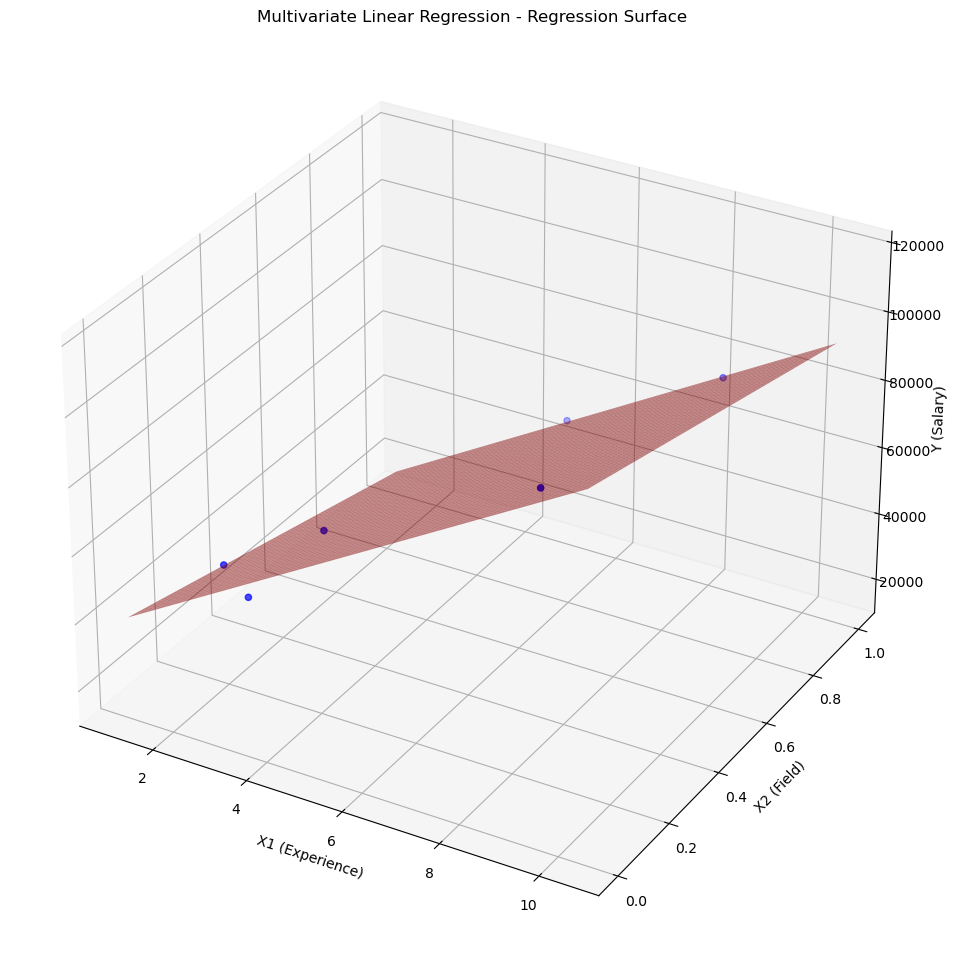

In [22]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Import csv
df = pd.read_csv('data/Salary_multiple.csv')

# Step 2: Simple Encoding for the 'Field' column
df.loc[:, 'Field'].replace(['Technical', 'Non-Technical'], [0, 1], inplace=True)

# Step 3: Splitting x (independent variables) and y (dependent variable)
x = df.iloc[:, :-1].values  # Independent variables (e.g., experience, field)
y = df.iloc[:, 2].values    # Dependent variable (e.g., salary)

# Step 4: Split data into training and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 5: Train the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(x_test)

# Step 7: Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared Score: {r2}")
print(f"Mean Squared Error: {mse}")

# Step 8: Plot the regression surface and points

# Create a 3D plot of the data
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Data points
ax.scatter(x_test[:, 0], x_test[:, 1], y_test, color='blue', label='Actual data')

# Plot the regression line
x1_range = np.linspace(min(x[:, 0]), max(x[:, 0]), 100)
x2_range = np.linspace(min(x[:, 1]), max(x[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_pred_grid = model.predict(np.c_[x1_grid.ravel(), x2_grid.ravel()]).reshape(x1_grid.shape)

# Plot the surface
ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='red', alpha=0.5)

# Labels and title
ax.set_xlabel('X1 (Experience)')
ax.set_ylabel('X2 (Field)')
ax.set_zlabel('Y (Salary)')
plt.title('Multivariate Linear Regression - Regression Surface')

plt.show()
